In [215]:
from music21 import *
from matplotlib import pyplot as plt

In [216]:
import importlib
try:
    importlib.reload(dataset)
    importlib.reload(salami)
    importlib.reload(song)
except NameError:
    pass

from parser import *

In [217]:
ds = dataset.Dataset()
# print(ds.songs)

In [218]:
s = ds.songs[0]
print(s)
c = s.chords()
print(c.blocks)

[0003] I Don't Mind - James Brown (8 weeks)
[(0.0, <ChordBlock silence>), (0.073469387, <ChordBlock A, intro (('A:min',), ('A:min',), ('C:maj',), ('C:maj',))>), (8.714013605, <ChordBlock (('A:min',), ('A:min',), ('C:maj',), ('C:maj',))>), (15.611995464, <ChordBlock (('A:min',), ('A:min',), ('C:maj',), ('C:maj',))>), (22.346394557, <ChordBlock B, verse (('A:min',), ('A:min',), ('C:maj',), ('C:maj',))>), (29.219433106, <ChordBlock (('A:min',), ('A:min',), ('C:maj',), ('C:maj',))>), (36.279501133, <ChordBlock (('F:maj',), ('F:maj',), ('D:maj',), ('D:maj',))>), (43.053922902, <ChordBlock (('G:maj',), ('G:maj',), ('C:maj',), ('C:maj',))>), (49.23802721, <ChordBlock B, verse (('A:maj',), ('A:maj',), ('C:maj',), ('C:maj',))>), (56.185079365, <ChordBlock (('A:maj',), ('A:maj',), ('C:maj',), ('C:maj',))>), (63.007732426, <ChordBlock (('F:maj',), ('F:maj',), ('D:maj',), ('D:maj',))>), (69.942857142, <ChordBlock (('G:maj',), ('G:maj',), ('C:maj',), ('C:maj',))>), (76.123990929, <ChordBlock A, int

In [219]:
from collections import Counter

prog_counts = Counter()
progs = {}
for s in ds.songs:
    c = s.chords()
    used_chords = set()
    for time, block in c.blocks:
        if block.bars:
            if ('N',) in block.bars:
                # human didn't know chord
                continue

            if block.bars not in used_chords:
                prog_counts[block.bars] += 1
                used_chords.add(block.bars)
                
                if block.bars not in progs:
                    progs[block.bars] = []
                progs[block.bars].append(s)
for bars, count in prog_counts.most_common(20):
    print(bars, count)

(('D:maj',), ('D:maj',), ('D:maj',), ('D:maj',)) 27
(('E:maj',), ('E:maj',), ('E:maj',), ('E:maj',)) 26
(('D:maj',), ('D:maj',)) 23
(('G:maj',), ('G:maj',)) 22
(('G:maj',), ('G:maj',), ('G:maj',), ('G:maj',)) 22
(('E:maj',), ('E:maj',)) 20
(('C:maj',), ('C:maj',), ('C:maj',), ('C:maj',)) 20
(('A:maj',),) 18
(('A:maj',), ('A:maj',), ('A:maj',), ('A:maj',)) 16
(('C:maj',), ('C:maj',)) 15
(('D:maj',), ('D:maj',), ('A:maj',), ('A:maj',)) 13
(('D:maj',),) 12
(('Bb:maj',), ('Bb:maj',), ('Bb:maj',), ('Bb:maj',)) 12
(('A:maj',), ('A:maj',), ('E:maj',), ('E:maj',)) 11
(('D:min',), ('D:min',), ('D:min',), ('D:min',)) 11
(('C:maj',), ('C:maj',), ('G:maj',), ('G:maj',)) 11
(('E:maj',),) 11
(('Eb:maj',), ('Eb:maj',)) 11
(('C:maj',),) 10
(('F:7',), ('F:7',), ('F:7',), ('F:7',)) 10


In [220]:
for bars, count in prog_counts.most_common(50):
    songs = progs[bars]
    print(bars, count)
    for s in songs:
        print("\t", s)
    print()

(('D:maj',), ('D:maj',), ('D:maj',), ('D:maj',)) 27
	 [0114] Sunshine Of Your Love - Cream (26 weeks)
	 [0167] No Charge - Melba Montgomery (10 weeks)
	 [0196] Love Me Warm And Tender - Paul Anka (12 weeks)
	 [0245] It Amazes Me - John Denver (7 weeks)
	 [0293] Every Little Thing She Does Is Magic - The Police (19 weeks)
	 [0351] Roll On Down The Highway - Bachman-Turner Overdrive (11 weeks)
	 [0359] Just Like Heaven - The Cure (19 weeks)
	 [0517] All Those Years Ago - George Harrison (16 weeks)
	 [0620] Twistin  The Night Away (From "Innerspace") - Rod Stewart (4 weeks)
	 [0656] Years From Now - Dr. Hook (9 weeks)
	 [0668] Big Yellow Taxi - Joni Mitchell (16 weeks)
	 [0681] With Or Without You - U2 (18 weeks)
	 [0690] Queen Of Hearts - Juice Newton (27 weeks)
	 [0734] I Will - Dean Martin (10 weeks)
	 [0743] One Way Or Another - Blondie (14 weeks)
	 [0818] Blue Jean - David Bowie (18 weeks)
	 [0891] Happy Jack - The Who (9 weeks)
	 [0914] If Not You - Dr. Hook (11 weeks)
	 [0935] Cry 

In [221]:
least_common = list(filter(lambda x: x[1] > 1, sorted(prog_counts.items(), key=lambda a: a[1])))
for bars, count in least_common[:20]:
    songs = progs[bars]
    print(bars, count)
    for s in songs:
        print("\t", s, s.tuning())
    print()

(('A:maj',), ('A:maj',), ('C:maj',), ('C:maj',)) 2
	 [0003] I Don't Mind - James Brown (8 weeks) 441.452
	 [0828] Journey To The Center Of The Mind - The Amboy Dukes (12 weeks) 441.022

(('Ab:maj',), ('Ab:maj',), ('Eb:7',), ('Eb:7',)) 2
	 [0004] You've Got A Friend - Roberta Flack,Donny Hathaway (12 weeks) 442.773
	 [1245] Paper Roses - Marie Osmond (16 weeks) 440.366

(('C:5',),) 2
	 [0006] The Rose - Bette Midler (25 weeks) 440.435
	 [0089] Fire And Ice - Pat Benatar (15 weeks) 440.685

(('Eb:7(#9)',), ('Eb:7(#9)',), ('Eb:7(#9)',), ('Eb:7(#9)',)) 2
	 [0015] Last Child - Aerosmith (15 weeks) 437.607
	 [0640] Think - James Brown (16 weeks) 436.51

(('Db:maj',),) 2
	 [0019] Here's Some Love - Tanya Tucker (5 weeks) 442.527
	 [1218] Behind Closed Doors - Charlie Rich (19 weeks) 439.864

(('E:maj', 'A:maj'), ('E:maj',), ('E:maj', 'A:maj'), ('E:maj',)) 2
	 [0023] And She Was - Talking Heads (20 weeks) 440.922
	 [0457] Not Fade Away - The Rolling Stones (13 weeks) 439.365

(('F:maj',), ('Bb

In [222]:
for s in ds.songs:
    if s.weeks_on_chart < 3:
        print(s, s.tuning())

[0123] Silent Night - Bing Crosby (2 weeks) 440.557
[0214] (Night Time Is) The Right Time - Ray Charles (1 week) 443.777
[0251] Theme From Electric Surfboard - Brother Jack McDuff (2 weeks) 440.517
[0372] Scarlet Fever - Kenny Rogers (2 weeks) 443.596
[0510] How Blue Can You Get - B.B. King (2 weeks) 443.731
[1034] Sugar Magnolia - Grateful Dead (2 weeks) 438.833
[1149] Going To Chicago Blues - Count Basie (1 week) 438.943
[1281] When It's Love - Van Halen (2 weeks) 440.741


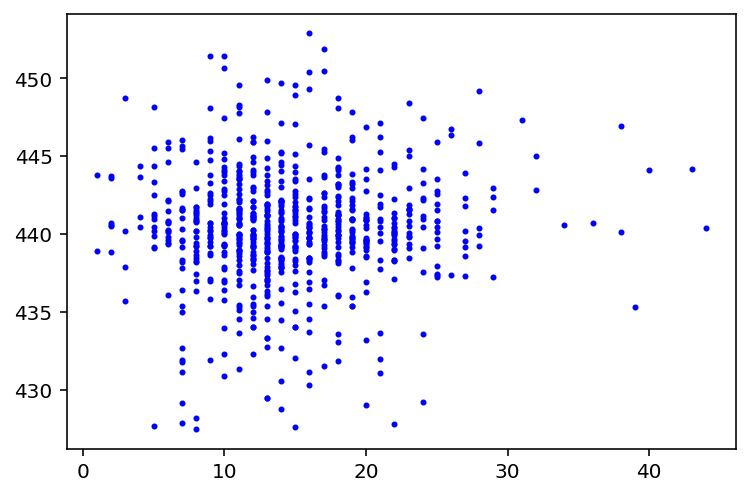

In [223]:
weeks = []
tunings = []
for s in ds.songs:
    weeks.append(s.weeks_on_chart)
    tunings.append(s.tuning())

plt.figure()
plt.plot(weeks,tunings, 'bo', markersize=2)

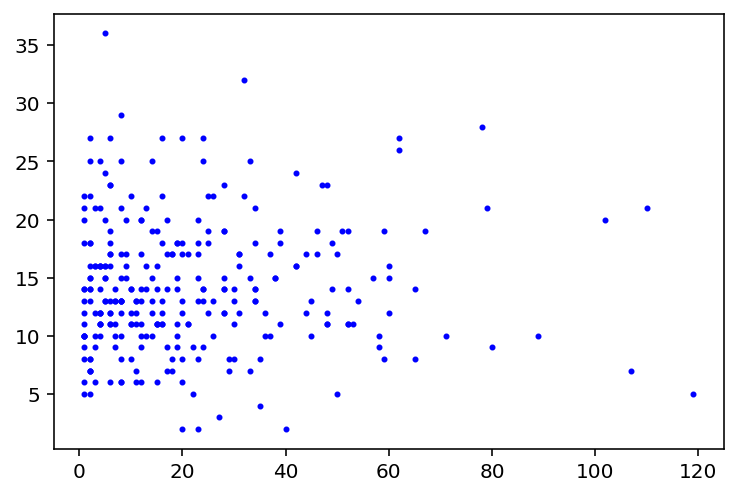

In [224]:
weeks = []
times = []
c = "D:maj"
for s in ds.songs:
    o = s.chords().chord_occurrences()
    if o[c] == 0:
        continue
    weeks.append(s.weeks_on_chart)
    times.append(o[c])

plt.figure()
plt.plot(times, weeks, 'bo', markersize=2)

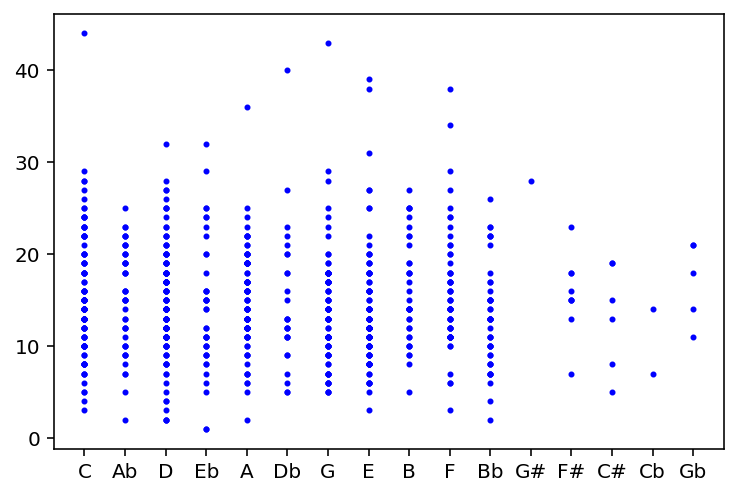

In [225]:
weeks = []
keys = []
for s in ds.songs:
    c = s.chords()
    weeks.append(s.weeks_on_chart)
    keys.append(c.tonic)

plt.figure()
plt.plot(keys, weeks, 'bo', markersize=2)

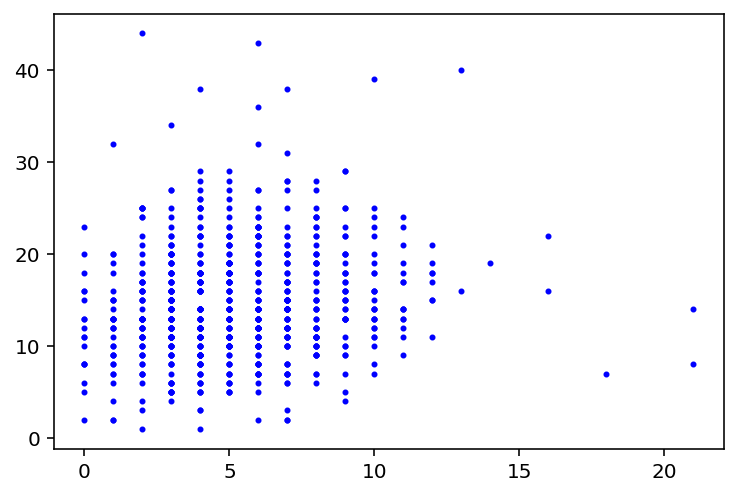

In [226]:
weeks = []
repetition = []
for s in ds.songs:
    c = s.chords()
    r = Counter()
    rep = 0
    for _, b in c.blocks:
        if b.block and b.block != "Z":
            r[b.block] += 1
    for _, count in r.items():
        rep += count - 1
#     print(r, rep)

    weeks.append(s.weeks_on_chart)
    repetition.append(rep)

plt.figure()
plt.plot(repetition, weeks, 'bo', markersize=2)

In [227]:
s = ds.songs[0]

In [228]:
list(s.chords().linear())

['A:min',
 'C:maj',
 'A:min',
 'C:maj',
 'A:min',
 'C:maj',
 'A:min',
 'C:maj',
 'A:min',
 'C:maj',
 'F:maj',
 'D:maj',
 'G:maj',
 'C:maj',
 'A:maj',
 'C:maj',
 'A:maj',
 'C:maj',
 'F:maj',
 'D:maj',
 'G:maj',
 'C:maj',
 'A:min',
 'C:maj',
 'A:min',
 'C:maj',
 'F:maj',
 'D:maj',
 'G:maj',
 'C:maj',
 'A:maj',
 'C:maj',
 'A:maj',
 'C:maj',
 'F:maj',
 'D:maj',
 'G:maj',
 'C:maj',
 'A:min',
 'C:maj',
 'A:min',
 'C:maj',
 'A:min']

In [229]:
s.chords().transition_counts()

{'A:min': {'C:maj': 9},
 'C:maj': {'A:min': 9, 'F:maj': 4, 'A:maj': 4},
 'F:maj': {'D:maj': 4},
 'D:maj': {'G:maj': 4},
 'G:maj': {'C:maj': 4},
 'A:maj': {'C:maj': 4}}

In [230]:
ds.songs[1].chords().transition_probabilities(roman=True)

{'I': {'IV': 0.5714285714285714,
  'VII': 0.09523809523809523,
  'I': 0.19047619047619047,
  'V': 0.09523809523809523,
  'bVII': 0.047619047619047616},
 'IV': {'I': 0.5625, 'bVII': 0.1875, 'IV': 0.125, 'iii': 0.125},
 'VII': {'III': 1.0},
 'III': {'vi': 0.875, 'III': 0.125},
 'vi': {'III': 0.625, 'ii': 0.375},
 'ii': {'V': 0.4, 'iii': 0.2, 'I': 0.4},
 'V': {'I': 0.7142857142857143, 'V': 0.2857142857142857},
 'iii': {'V': 0.3333333333333333, 'ii': 0.6666666666666666},
 'bVII': {'IV': 0.75, 'vi': 0.25}}